<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Causal-Forest-Estimation-of-Heterogenous-Corruption-Audit-Effects" data-toc-modified-id="Causal-Forest-Estimation-of-Heterogenous-Corruption-Audit-Effects-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Causal Forest Estimation of Heterogenous Corruption Audit Effects</a></span><ul class="toc-item"><li><span><a href="#Brief-Description-of-Olken-(2007)" data-toc-modified-id="Brief-Description-of-Olken-(2007)-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Brief Description of Olken (2007)</a></span></li><li><span><a href="#Variables-used-in-the-simulation-study" data-toc-modified-id="Variables-used-in-the-simulation-study-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Variables used in the simulation study</a></span></li></ul></li><li><span><a href="#Variables" data-toc-modified-id="Variables-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Variables</a></span></li></ul></div>

# Causal Forest Estimation of Heterogenous Corruption Audit Effects

In [1]:
install.packages("grf")
library(grf)

Warning message in install.packages("grf"):
“installation of package ‘grf’ had non-zero exit status”Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Warning message:
“package ‘grf’ was built under R version 3.6.3”

In [2]:
install.packages("gridExtra")
library(gridExtra)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [3]:
install.packages("DiagrammeR")
library(DiagrammeR)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [4]:
install.packages("ggstance")
library(ggstance)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [5]:
install.packages("itertools")
library("itertools")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Loading required package: iterators


In [6]:
install.packages("truncnorm")
install.packages("ggplot2")
install.packages("tmvtnorm")

library(truncnorm)

library(tmvtnorm)

library(foreign)
library(ggplot2)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Loading required package: mvtnorm
Loading required package: Matrix
Loading required package: stats4
Loading required package: gmm
Loading required package: sandwich
Warning message:
“package ‘sandwich’ was built under R version 3.6.3”
Attaching package: ‘ggplot2’

The following objects are masked from ‘package:ggstance’:

    GeomErrorbarh, geom_errorbarh



In [7]:
install.packages("MASS")
library(MASS)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [8]:
install.packages("lmtest")
library(lmtest)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric



In [9]:
install.packages("grf")
library(grf)

Warning message in install.packages("grf"):
“installation of package ‘grf’ had non-zero exit status”Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


## Brief Description of Olken (2007)

Benjamin Olken (2007) investigates the effect of top-down monitoring on corruption in village projects using data from a randomized controlled trial he conducted in around 600 Indonesian villages. By the time the experiment was launched, each village had received funds for road projects through a nationwide infrastructure program but had not yet started the construction. Randomly chosen villages were informed that their road project would be monitored by the central government audit agency, which meant an increase in the probability of external government audit from approximately 4 percent to 100 percent for these villages. Audits can lead to prosecution of village officials in the case of malfeasance. Randomization was clustered at the subdistrict level. Audits were stratified by district and time the subdistrict had participated in the infrastructure program. The probability that a village receives the audit treatment is independent of all village or stratum characteristics, however, such that consistent estimation of the average treatment effect is possible even without including stratum fixed effects (Olken 2007). Since the author does not provide data on the time the subdistrict has participated in the infrastructure program and the probability that a subdistrict receives treatment is constant, I will not introduce a stratum variable in the simulation study. Two further treatments that meant to increase grassroots participation were administered, but these were independent of the audit treatment. After consulting with Prof Janys, I will disregard these further treatments in the simulation study in order to keep the data generating processes more tractable. Olken (2007)  uses the discrepancy between costs reported by the village and the estimate of an independent team of engineers as a measure of corruption.

## Variables used in the simulation study

The following variables were used in the simulation study:

* Dependent variable, i.e. major items in roads and ancilliary projects 
* Audit treatment, i.e. increasing probability of external government audit from 4 to 100 percent

* Village Population (in 1,000)
* Mosques per 1,000 population
* Total budget (in rp. million)
* Number subprojects
* Percentage of household that are poor
* Distance to subdistrict
* Village head years of education
* Village head salary (hectares)
* Village head age
* Mountainous dummy




In [10]:
randomization_data <- read.dta("/Users/gerwinkiessling/Desktop/jpepublic/jperandomizationdata.dta")
(road_data <- read.dta("/Users/gerwinkiessling/Desktop/jpepublic/jperoaddata.dta"))

merged_data<-merge(randomization_data, road_data, by="desaid")
merged_data<-merged_data[!is.na(merged_data$lndiffeall4mainancil),]
merged_data$desaid<-as.numeric(merged_data$desaid)

X_cont=as.data.frame(cbind(merged_data$zpop, merged_data$totalmesjid, merged_data$totalallocation, merged_data$z4RABnumsubproj, merged_data$zpercentpoorpra, merged_data$zdistancekec,
        merged_data$zkadesedyears, merged_data$zkadesage, merged_data$zkadesbengkoktotal))


z7enumcode,audit,auditstratnum,und,fpm,undfpm,sd,lndiffeburuh,lndiffeall4,lndiffeall3mat,...,lndiffqtall4,lndiffpall4,totalprojusd,stdz13scorefisik,stdz13scoreadmin,stdz12scorefisikboth,stdz12scoreadminboth,kecnum,desaid,kecid
F23,0,11,0,0,0,0,0.80196363,0.38527447,0.37608007,...,0.330694944,0.051268794,4507.255,NA,NA,NA,NA,001,3301001001,3301001
F23,0,11,0,1,1,0,0.51758903,-0.09574836,-0.23895392,...,-0.025945611,-0.030868988,7702.855,NA,NA,NA,NA,001,3301001002,3301001
F23,0,11,1,0,1,0,1.59478140,0.14771932,-0.27322078,...,0.355605900,-0.021249659,4567.389,NA,NA,NA,NA,001,3301001003,3301001
F23,0,11,1,0,1,1,0.61145359,-0.18259121,-0.31239548,...,-0.082396172,-0.109253176,1896.686,NA,NA,NA,NA,001,3301001004,3301001
F23,0,11,0,0,0,0,0.57933968,-0.29304767,-0.39842680,...,-0.009104517,-0.217185318,8036.473,NA,NA,NA,NA,001,3301001005,3301001
F23,1,11,0,1,1,0,0.64566767,-0.09736358,-0.10423158,...,0.022496168,-0.122077160,7759.230,-0.20387749,-0.06129840,0.33622959,0.7783315,002,3301002001,3301002
F23,1,11,0,0,0,0,0.13024548,-0.12150725,-0.13674238,...,-0.016689623,-0.080888718,9257.103,-1.09297717,0.67032188,1.02781534,-0.1010358,002,3301002002,3301002
F23,1,11,0,1,1,1,0.26421076,0.11745975,0.09242168,...,0.098885514,0.065994464,6232.739,-0.84472221,-0.07182464,1.38177633,0.4973977,002,3301002003,3301002
F23,1,11,1,0,1,1,0.93529183,0.17976519,0.15495154,...,0.281060249,-0.164035439,6131.706,-1.98207688,-0.68220496,-0.01990974,-1.0321302,002,3301002004,3301002
F23,1,11,0,0,0,0,0.07041851,-0.05508656,-0.08923000,...,0.123631261,-0.247277439,6206.667,-2.38332677,-1.61344719,0.59761626,0.2259872,002,3301002005,3301002


In [100]:
data_generation<-function(N, model){

set.seed(1)
mu<-colMeans(X_cont, na.rm=TRUE)
sd<-apply(X_cont, 2, sd, na.rm=TRUE)

cov<-var(X_cont, na.rm=TRUE)

glm.fit<-glm(podeszhill ~ zpop+totalmesjid+totalallocation+z4RABnumsubproj+zpercentpoorpra+zdistancekec+zkadesedyears+zkadesage+zkadesbengkoktotal, data = merged_data, family = "binomial")



X_sim<-as.data.frame(rtmvnorm(n=N, mean = mu, sigma = cov, lower=rep(0,9), upper=c(rep(Inf,4), 1, rep(Inf,4))))

colnames(X_sim) <- c("zpop", "totalmesjid", "totalallocation", "z4RABnumsubproj", "zpercentpoorpra", "zdistancekec", "zkadesedyears", "zkadesage", "zkadesbengkoktotal")

#X_sim
mountainous<-c()
X_sim$mountainous<-predict(glm.fit,newdata=X_sim, type="response")
for (i in 1:nrow(X_sim)){
    X_sim$podeszhill[i]<-rbinom(n=1,size=1,prob=X_sim$mountainous[i])
    }
similarity_vars<-c("zpop", "totalmesjid", "totalallocation", "zpercentpoorpra", "podeszhill")

x_similarity<-as.data.frame(scale(X_sim[similarity_vars]))

for (i in 1:nrow(x_similarity)){
    x_similarity$similarity_score[i]<-sum(x_similarity[i,])+rnorm(n=1, sd=5, mean=0)
}

X_sim<-cbind(X_sim, "similscore"=x_similarity$similarity_score)
simulation_data<<-X_sim[order(X_sim$similscore),]



for (i in 1:nrow(simulation_data)){
   simulation_data$subdistrict[i]<-ceiling(i/(nrow(simulation_data)/150))
}



randomization_subdistricts<-rbinom(size=1, n=150, 0.48)
simulation_data$audit<-rep(randomization_subdistricts,each=nrow(simulation_data)/150)
    
if (model=='simple') {

simulation_data$lndiffeall4mainancil<-0.22-0.07*simulation_data$audit+
    0.0001*simulation_data$totalallocation-
    0.017*simulation_data$zkadesbengkoktotal-
    0.016*simulation_data$audit*simulation_data$zkadesbengkoktotal+
    rnorm(nrow(simulation_data), mean=0, sd=0.03)
    
    simulation_data$tau<- -0.07-0.016*simulation_data$zkadesbengkoktotal
  
    
    
    linear_model<-lm(lndiffeall4mainancil~audit+totalallocation+zkadesbengkoktotal+audit*zkadesbengkoktotal, 
                     data=simulation_data)
    
    }
    
if (model=='medium') {
    
simulation_data$lndiffeall4mainancil<-0.27-0.09*simulation_data$audit+
    0.0001*simulation_data$totalallocation-
    0.0016*simulation_data$zkadesedyears+
    0.007*simulation_data$zkadesbengkoktotal+
    0.00000016*simulation_data$totalallocation^2-
    0.0002*simulation_data$zkadesbengkoktotal^2-
    0.01*simulation_data$audit*simulation_data$zkadesbengkoktotal-
    0.001*simulation_data$audit*simulation_data$totalallocation+
    0.0003*simulation_data$audit*simulation_data$totalallocation*simulation_data$zkadesbengkoktotal+
    0.000008*simulation_data$audit*(simulation_data$totalallocation^2)+
    0.0006*simulation_data$audit*simulation_data$zkadesbengkoktotal^2+             
    rnorm(nrow(simulation_data), mean=0, sd=0.1)
    
    simulation_data$tau<- -0.09-0.01*simulation_data$zkadesbengkoktotal-
    0.001*simulation_data$totalallocation+0.0003*simulation_data$totalallocation*
    simulation_data$zkadesbengkoktotal+0.000008*simulation_data$totalallocation^2+
    0.0006*simulation_data$zkadesbengkoktotal^2
    
                                                  
    }
   
if (model=='weird') {
    
simulation_data$lndiffeall4mainancil<-0.27-0.09*simulation_data$audit+
    0.0001*simulation_data$totalallocation-
    0.0016*simulation_data$zkadesedyears+
    0.007*simulation_data$zkadesbengkoktotal+
    0.00000016*simulation_data$totalallocation^2-
    0.0002*simulation_data$zkadesbengkoktotal^2-
    0.01*simulation_data$audit*simulation_data$zkadesbengkoktotal-
    0.001*simulation_data$audit*simulation_data$totalallocation+
    0.0003*simulation_data$audit*simulation_data$totalallocation*simulation_data$zkadesbengkoktotal+
    0.000006*simulation_data$audit*(simulation_data$totalallocation^2)+
    0.0003*simulation_data$audit*simulation_data$zkadesbengkoktotal^2+              
    rnorm(nrow(simulation_data), mean=0, sd=0.05)
    
    simulation_data$tau<- -0.09-0.01*simulation_data$zkadesbengkoktotal-
    0.001*simulation_data$totalallocation+0.0003*simulation_data$totalallocation*
    simulation_data$zkadesbengkoktotal+0.000006*simulation_data$totalallocation^2+
    0.0003*simulation_data$zkadesbengkoktotal^2
    
                                                  
    }

if (model=='that'){

simulation_data$lndiffeall4mainancil<- 0.27-0.07*simulation_data$audit+
        0.0002*simulation_data$totalallocation-
        0.0016*simulation_data$zkadesedyears+
        0.007*simulation_data$zkadesbengkoktotal-
        0.01*simulation_data$zpercentpoorpra-
        0.02*simulation_data$audit*simulation_data$zpercentpoorpra-
        0.01*simulation_data$audit*simulation_data$zkadesbengkoktotal-
        0.0002*simulation_data$audit*simulation_data$totalallocation+
        0.0001*simulation_data$zkadesbengkoktotal^2+
        0.0003*simulation_data$audit*simulation_data$zkadesbengkoktotal^2+
        0.00009*simulation_data$audit*simulation_data$zkadesbengkoktotal*simulation_data$totalallocation+
        rnorm(nrow(simulation_data), mean=0, sd=0.03)
    
    simulation_data$tau<- -0.07-0.02*simulation_data$zpercentpoorpra-0.01*simulation_data$zkadesbengkoktotal-
    0.0002*simulation_data$totalallocation+0.00009*simulation_data$totalallocation*simulation_data$zkadesbengkoktotal+
    0.0003*simulation_data$zkadesbengkoktotal^2
    }

if (model=='that2'){

simulation_data$lndiffeall4mainancil<- 0.27-0.07*simulation_data$audit+
        0.0002*simulation_data$totalallocation-
        0.0016*simulation_data$zkadesedyears+
        0.007*simulation_data$zkadesbengkoktotal-
        0.01*simulation_data$zpercentpoorpra-
        0.1*simulation_data$audit*simulation_data$zpercentpoorpra-
        0.04*simulation_data$audit*simulation_data$zkadesbengkoktotal-
        0.0008*simulation_data$audit*simulation_data$totalallocation+
        0.0001*simulation_data$zkadesbengkoktotal^2+
        #0.0006*simulation_data$audit*simulation_data$zkadesbengkoktotal^2+
        0.0002*simulation_data$audit*simulation_data$zkadesbengkoktotal*simulation_data$totalallocation+
        rnorm(nrow(simulation_data), mean=0, sd=0.03)
    
    simulation_data$tau<- -0.07-0.1*simulation_data$zpercentpoorpra-0.04*simulation_data$zkadesbengkoktotal-
    0.0008*simulation_data$totalallocation+0.0002*simulation_data$zkadesbengkoktotal*simulation_data$totalallocation
    }
    
if (model=='complex') {
    
    simulation_data$lndiffeall4mainancil<-0.5-
    0.003*simulation_data$zkadesage-
    0.05*simulation_data$audit-
    0.01*simulation_data$zpercentpoorpra-
    0.001*simulation_data$zpop-
    0.01*simulation_data$totalmesjid-
    0.0005*simulation_data$totalallocation+
    0.005*simulation_data$zkadesbengkoktotal-
    0.001*simulation_data$zdistancekec-
    0.002*simulation_data$z4RABnumsubproj+
    0.0002*simulation_data$audit*simulation_data$zdistancekec-
    0.2*simulation_data$audit*simulation_data$zpercentpoorpra-
    0.02*simulation_data$audit*simulation_data$zpop-
    0.004*simulation_data$audit*simulation_data$totalmesjid-
    0.002*simulation_data$audit*simulation_data$totalallocation-
    0.006*simulation_data$audit*simulation_data$zkadesbengkoktotal+
    0.008*simulation_data$audit*simulation_data$z4RABnumsubproj+
    rnorm(nrow(simulation_data), mean=0, sd=0.05)
    
    simulation_data$tau<- -0.05+
    0.0002*simulation_data$zdistancekec*simulation_data$audit-
    0.2*simulation_data$zpercentpoorpra-
    0.01*simulation_data$zpop-
    0.004*simulation_data$totalmesjid-
    0.002*simulation_data$totalallocation-
    0.06*simulation_data$zkadesbengkoktotal+
    0.001*simulation_data$z4RABnumsubproj
    
    }
   
  
return(simulation_data)
}

#{
(Intercept)                                           5.3143e-01  2.3577e-01
audit.x                                              -1.5802e-02  3.5227e-01
zpercentpoorpra                                       2.4442e-01  1.9218e-01
zpop                                                  2.2063e-02  1.6587e-02
totalmesjid                                          -2.5208e-02  3.2118e-02
totalallocation                                       9.7908e-04  1.8246e-03
z4RABnumsubproj                                      -3.8968e-02  1.6794e-02
zdistancekec                                         -2.5885e-03  6.0762e-03
zkadesedyears                                        -8.0764e-03  8.7812e-03
zkadesage                                            -3.7880e-03  3.1181e-03
zkadesbengkoktotal                                    8.8701e-03  2.6310e-02
podeszhill                                           -5.0589e-02  5.6207e-02
I(totalallocation^2)                                 -8.6056e-07  6.8227e-06
I(zkadesbengkoktotal^2)                              -1.6561e-04  1.4061e-03
audit.x:zpercentpoorpra                              -3.3472e-01  2.9098e-01
audit.x:zpop                                         -2.8905e-02  2.3776e-02
zpercentpoorpra:zpop                                 -5.4060e-02  4.1737e-02
audit.x:totalmesjid                                  -3.3681e-03  4.2579e-02
audit.x:totalallocation                              -1.5961e-03  3.0325e-03
audit.x:z4RABnumsubproj                               1.3071e-02  3.0426e-02
audit.x:zdistancekec                                  1.4849e-03  7.9871e-03
audit.x:zkadesedyears                                 8.9696e-03  1.4009e-02
audit.x:zkadesage                                     1.5651e-03  4.0372e-03
audit.x:zkadesbengkoktotal                           -5.8040e-02  3.6432e-02
audit.x:podeszhill                                    2.3271e-02  7.6176e-02
totalallocation:zkadesbengkoktotal                   -8.8068e-05  3.3592e-04
audit.x:I(totalallocation^2)                          9.7596e-06  1.1480e-05
audit.x:I(zkadesbengkoktotal^2)                       1.2916e-03  1.5831e-03
I(totalallocation^2):I(zkadesbengkoktotal^2)          4.0755e-08  1.1168e-07
audit.x:zpercentpoorpra:zpop                          3.8149e-02  5.7637e-02
audit.x:totalallocation:zkadesbengkoktotal            6.2757e-04  4.5203e-04
audit.x:I(totalallocation^2):I(zkadesbengkoktotal^2) -1.3948e-07
    


#plot(get_tree(this$train_forest_honest,209))
#plot(get_tree(this$train_forest_adaptive,209))

plot(get_tree(this$train_forest_honest,209))
plot(get_tree(this$train_forest_adaptive,209))

In [148]:
MSE_function<-function(n_test, n_train, n.trees, model_true){
    
    MSE_honest<-list()
    MSE_adaptive<-list()
    MSE_linear<-list()
    coverage_honest<-list()
    coverage_adaptive<-list()
    
    simulation_data<-data_generation(N=n_train, model=model_true)
    X_train=cbind(simulation_data$totalallocation, simulation_data$zkadesbengkoktotal, simulation_data$zkadesedyears, simulation_data$totalmesjid, simulation_data$zpop, simulation_data$z4RABnumsubproj, simulation_data$zpercentpoorpra, simulation_data$zdistancekec, simulation_data$zkadesage)
    test_data<-data_generation(N=n_test, model=model_true)
    X_test<-cbind(test_data$totalallocation, test_data$zkadesbengkoktotal, test_data$zkadesedyears, test_data$totalmesjid, test_data$zpop, test_data$z4RABnumsubproj, test_data$zpercentpoorpra, test_data$zdistancekec, test_data$zkadesage)
    
    for (model_est in c('simple', 'that', 'complex')){
    
    for (cluster in c('Yes', 'No')){
    
    if (cluster=='Yes')    { 
    train_forest_honest<-causal_forest(X_train, simulation_data$lndiffeall4mainancil, simulation_data$audit, W.hat=0.48, clusters=simulation_data$subdistricts, mtry=7, min.node.size=5, num.trees=n.trees)
    train_forest_adaptive<-causal_forest(X_train, simulation_data$lndiffeall4mainancil, simulation_data$audit, W.hat=0.48, mtry=7, clusters=simulation_data$subdistricts, min.node.size=5, honesty=FALSE, num.trees=n.trees)
    }
    
    if (cluster=='No') {
    train_forest_honest<-causal_forest(X_train, simulation_data$lndiffeall4mainancil, simulation_data$audit, W.hat=0.48,  mtry=7, min.node.size=5, num.trees=n.trees)
    train_forest_adaptive<-causal_forest(X_train, simulation_data$lndiffeall4mainancil, simulation_data$audit, W.hat=0.48, mtry=7,  min.node.size=5, honesty=FALSE, num.trees=n.trees)
    }
    
    if (model_est=='simple'){
        
    linear_model<-lm(lndiffeall4mainancil~totalallocation+audit*zkadesbengkoktotal, 
                     data=simulation_data)
    
    coefficients<-linear_model$coefficients
    
    tauhat_linear<-coefficients[3]+coefficients[5]*test_data$zkadesbengkoktotal
        
    }
    
    if (model_est=='medium'){
        
    linear_model<-lm(lndiffeall4mainancil~zkadesedyears+audit*zkadesbengkoktotal*totalallocation+audit*I(zkadesbengkoktotal^2)+audit*I(totalallocation^2), data=simulation_data)
        
    coefficients<-linear_model$coefficients
        
    tauhat_linear<-coefficients[3]+
    coefficients[8]*test_data$zkadesbengkoktotal+
    coefficients[9]*test_data$totalallocation+
    coefficients[11]*test_data$zkadesbengkoktotal^2+
    coefficients[12]*test_data$totalallocation^2+    
    coefficients[13]*test_data$zkadesbengkoktotal*test_data$totalallocation  
    }
        
    if (model_est=='that'){
        
    linear_model<-lm(lndiffeall4mainancil~zkadesedyears+audit*zpercentpoorpra+audit*zkadesbengkoktotal*totalallocation+audit*I(zkadesbengkoktotal^2), data=simulation_data)
        
    coefficients<-linear_model$coefficients
        
    tauhat_linear<-coefficients[3]+
        coefficients[8]*test_data$zpercentpoorpra+
        coefficients[9]*test_data$zkadesbengkoktotal+
        coefficients[10]*test_data$totalallocation+
        coefficients[12]*test_data$zkadesbengkoktotal^2
        coefficients[13]*test_data$zkadesbengkoktotal*test_data$totalallocation
    }
        
       if (model_est=='that2'){
        
    linear_model<-lm(lndiffeall4mainancil~zkadesedyears+audit*zpercentpoorpra+audit*zkadesbengkoktotal*totalallocation, data=simulation_data)
        
    coefficients<-linear_model$coefficients
        
    tauhat_linear<-coefficients[3]+
        coefficients[7]*test_data$zpercentpoorpra+
        coefficients[8]*test_data$zkadesbengkoktotal+
        coefficients[9]*test_data$totalallocation+
        coefficients[11]*test_data$zkadesbengkoktotal*test_data$totalallocation
    }
        
        if (model_est=='complex'){
        
        linear_model<-lm(lndiffeall4mainancil~zkadesage+audit.x*zdistancekec+audit.x*zpercentpoorpra+audit.x*zpop+audit.x*totalmesjid+audit.x*totalallocation+audit.x*zkadesbengkoktotal+audit.x*z4RABnumsubproj, data=merged_data)

        coefficients<-linear_model$coefficients
            
        tauhat_linear<-coefficients[3]+
                        coefficients[11]*test_data$zdistancekec+
            coefficients[12]*test_data$zpercentpoorpra+
            coefficients[13]*test_data$zpop+
            coefficients[14]*test_data$totalmesjid+
            coefficients[15]*test_data$totalallocation+
            coefficients[16]*test_data$zkadesbengkoktotal+
            coefficients[17]*test_data$z4RABnumsubproj
            
            }
honest_predict<-predict(train_forest_honest, X_test, estimate.variance=TRUE)
adaptive_predict<-predict(train_forest_adaptive, X_test, estimate.variance=TRUE)

tauhat_honest<-honest_predict$predictions
tauhat_adaptive<-adaptive_predict$predictions
    
variance_honest<-honest_predict$variance.estimates
variance_adaptive<-adaptive_predict$variance.estimates
    
CI_honest_lower<-tauhat_honest-qnorm(0.95, mean=0, sd=1)*sqrt(variance_honest)
CI_honest_upper<-tauhat_honest+qnorm(0.95, mean=0, sd=1)*sqrt(variance_honest)
CI_adaptive_lower<-tauhat_adaptive-qnorm(0.95, mean=0, sd=1)*sqrt(variance_adaptive)
CI_adaptive_upper<-tauhat_adaptive+qnorm(0.95, mean=0, sd=1)*sqrt(variance_adaptive)

coverage_honest[[cluster]]<-mean(CI_honest_lower<=test_data$tau&test_data$tau<=CI_honest_upper)
coverage_adaptive[[cluster]]<-mean(CI_adaptive_lower<=test_data$tau&test_data$tau<=CI_adaptive_upper)


MSE_linear[[model_est]]<-mean((test_data$tau-tauhat_linear)^2)
MSE_honest[[cluster]]<-mean((test_data$tau-tauhat_honest)^2)
MSE_adaptive[[cluster]]<-mean((test_data$tau-tauhat_adaptive)^2)

complete_data<-cbind(test_data, tauhat_honest, tauhat_linear)
}
}

return(list("MSE linear model"=MSE_linear,
            "MSE Honest, Cluster-Robust CF"=MSE_honest[['Yes']],
            "MSE Honest, not Cluster-Robust CF"=MSE_honest[['No']],
            "MSE Adaptive, Cluster-Robust CF"=MSE_adaptive[['Yes']],
            "MSE Adaptive, not Cluster-Robust CF"=MSE_adaptive[['No']],
            "Coverage Probability Honest, Cluster-Robust CF"=coverage_honest[['Yes']],
            "Coverage Probability Honest, not Cluster-Robust CF"=coverage_honest[['No']],
            complete_data=complete_data))
}

In [135]:
mylist <- list()
MSE_df <- data.frame()
this<-matrix()
for (n in c(600, 1800)){
for (model in c('simple','that', 'complex')){
    mylist[[sprintf("True model: %s. %s", model, n)]]<-MSE_function(n_test=3000, n_train=n, n.trees=2000, model_true=model)[1:7]
    MSE_df <- do.call("cbind",mylist)
  
}
}

In [136]:
MSE_df

,True model: simple. 600,True model: that. 600,True model: complex. 600,True model: simple. 1800,True model: that. 1800,True model: complex. 1800
MSE linear model,"4.214743e-06, 2.602282e-05, 1.463370e-02","0.0004769909, 0.0038399544, 0.0074141424","0.11638220, 0.09342985, 0.41498810","4.978294e-06, 2.945741e-05, 1.463370e-02","0.0004703452, 0.0028846450, 0.0074141424","0.1115689, 0.1168843, 0.4149881"
"MSE Honest, Cluster-Robust CF",0.0005596755,0.0004020752,0.1158724,5.756978e-05,0.0002184049,0.1080466
"MSE Honest, not Cluster-Robust CF",0.0005539232,0.0003998213,0.1155692,5.828583e-05,0.0002173677,0.1079327
"MSE Adaptive, Cluster-Robust CF",0.0004392737,0.0003089423,0.1113498,0.0001744553,0.0002256817,0.1033405
"MSE Adaptive, not Cluster-Robust CF",0.000431097,0.000311853,0.1108792,0.0001701175,0.0002240863,0.1034751
"Coverage Probability Honest, Cluster-Robust CF",0.6973333,0.5226667,0.07633333,0.88,0.569,0.077


In [150]:
MSE_function(n_test=600, n_train=900, n.trees=100, model_true='medium')[c("Coverage Probability Honest, Cluster-Robust CF", "Coverage Probability Honest, not Cluster-Robust CF")]

$`Coverage Probability Honest, Cluster-Robust CF`
[1] 0.7883333

In [ ]:
trees<-c(10, 20, 30, 50, 1000, 2000, 5000)
dataf<-data.frame(
trees=NA,
cluster=NA,
nocluster=NA)
#coverage_prob<-list()
for (i in index(trees)){
    element<-trees[i]
    coverage<-MSE_function(n_test=6000, n_train=6000, n.trees=element, 
                           model_true='medium')[c("Coverage Probability Honest, Cluster-Robust CF", 
                                                  "Coverage Probability Honest, not Cluster-Robust CF")]
    #coverage_prob[[i]]<-rbind(element, "cluster"=coverage[1],"nocluster"=coverage[2])
    #dataf <- do.call("cbind", data.frame(coverage_prob))
    dataf[i,"trees"]<-element
    dataf[i,"cluster"]<-coverage[1]
    dataf[i,"nocluster"]<-coverage[2]
    }

In [134]:
source("myfunction.R")
myfunc(5)

[1] 6

In [ ]:
dataf

In [ ]:
ggplot(dataf, aes(trees)) + 
  geom_line(aes(y = cluster, colour = "var0"))+
  geom_line(aes(y=nocluster, colour="var1"))

In [ ]:
observations<-c(900)
dataf<-data.frame(
observations=NA,
cluster=NA,
nocluster=NA)
#coverage_prob<-list()
for (i in index(observations)){
    element<-observations[i]
    coverage<-MSE_function(n_test=900, n_train=element, n.trees=600, model_true='medium', model_est='medium')$coverage_honest
    #coverage_prob[[i]]<-rbind(element, "cluster"=coverage[1],"nocluster"=coverage[2])
    #dataf <- do.call("cbind", data.frame(coverage_prob))
    dataf[i,"observations"]<-element
    dataf[i,"cluster"]<-coverage[1]
    dataf[i,"nocluster"]<-coverage[2]
    }


In [ ]:
dataf

In [ ]:
ggplot(dataf, aes(observations)) + 
  geom_line(aes(y = cluster, colour = "var0"))+
  geom_line(aes(y=nocluster, colour="var1"))

allocation_sequence<-seq(min(test_data$simulation_data$totalallocation), max(test_data$simulation_data$totalallocation),
                        500)
payment_sequence<-seq(min(test_data$simulation_data$zkadesbengkoktotal), max(test_data$simulation_data$zkadesbengkoktotal),
                        500)


In [104]:
plot_data<-MSE_function(n_test=3000, n_train=3000, n.trees=1000, model_true='complex', model_est='complex')$complete_data

Warning message:
“Removed 68 rows containing missing values (geom_point).”Warning message:
“Removed 68 rows containing missing values (geom_point).”Warning message:
“Removed 68 rows containing missing values (geom_point).”

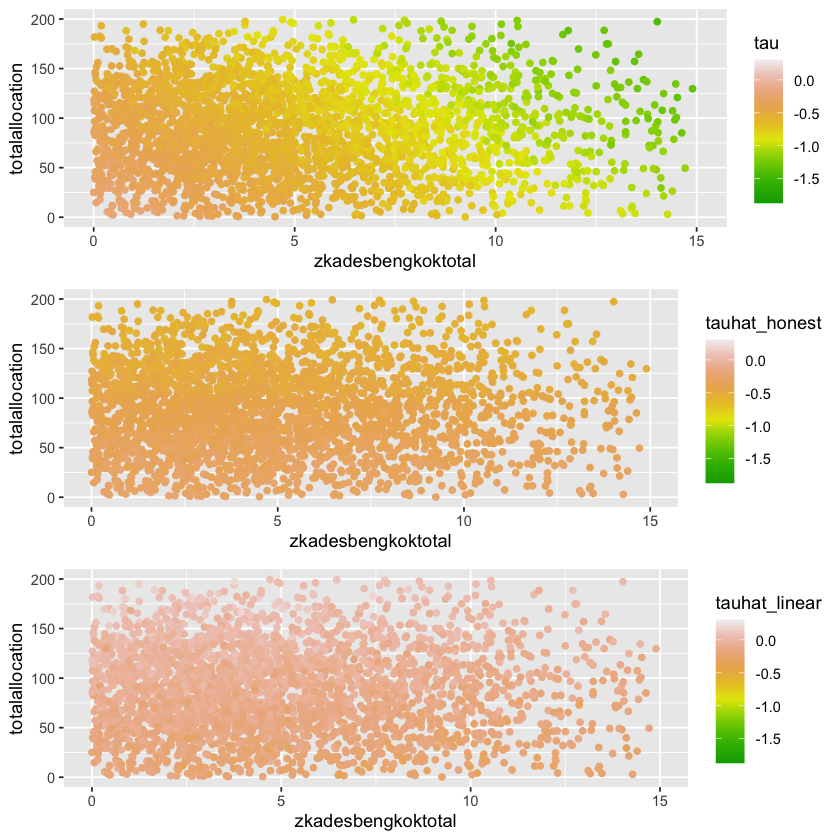

In [105]:
minimum<-min(plot_data$tau, plot_data$tauhat_honest, plot_data$tauhat_linear)
maximum<-max(plot_data$tau, plot_data$tauhat_honest, plot_data$tauhat_linear)

p1<-ggplot(plot_data, aes(zkadesbengkoktotal, totalallocation))+
    geom_point(aes(colour = tau)) +
    xlim(0, 15)+
    ylim(0, 200)+
      scale_colour_gradientn(colours = terrain.colors(10),limits=c(minimum, maximum))

p2<-ggplot(plot_data, aes(zkadesbengkoktotal, totalallocation))+
    geom_point(aes(colour = tauhat_honest)) +
    xlim(0, 15)+
    ylim(0, 200)+
      scale_colour_gradientn(colours = terrain.colors(10), limits=c(minimum,maximum))

p3<-ggplot(plot_data, aes(zkadesbengkoktotal, totalallocation))+
    geom_point(aes(colour = tauhat_linear)) +
    xlim(0, 15)+
    ylim(0, 200)+
      scale_colour_gradientn(colours = terrain.colors(10), limits=c(minimum,maximum))

grid.arrange(p1, p2, p3, nrow = 3)


In [ ]:
rbinom(2,10,0.5)

cf<-causal_forest(X, merged_data$lndiffeall4mainancil, merged_data$audit.x, clusters=merged_data$desaid, min.node.size=30)
?causal_forest
cf
tau.hat = predict(cf)$predictions
tau.hat
ATE = average_treatment_effect(cf)
ATE
paste("95% CI for the ATE:", round(ATE[1], 3),
      "+/-", round(qnorm(0.975) * ATE[2], 3))
a<-round(merged_data$totalallocation/50)*50
dev.off()
options(device = "RStudioGD")
boxplot(tau.hat ~ merged_data$podeszhill, xlab = "X1", ylab = "estimated CATE")
boxplot(tau.hat ~ round(merged_data$zpercentpoorpra), xlab = "X1", ylab = "estimated CATE")
boxplot(tau.hat ~ round(merged_data$zpop), xlab = "X1", ylab = "estimated CATE")
boxplot(tau.hat ~ a, xlab = "X1", ylab = "estimated CATE")
boxplot(tau.hat ~ merged_data$zkadesedyears, xlab = "X1", ylab = "estimated CATE")

# Variables

Y: Major items in roads and ancilliary projects

W: Audit Treatment (increasing probability of external government audit from 4 to 100 percent)

X1: Village Population (in 1,000)
X2: Mosques per 1,000 population
X3: Total budget (in rp. million)
X4: Number subprojects
X5: Percent household poor
X6: Distance to subdistrict
X7: Village head education
X8: Village head salary (hectares)
X9: Mountainous dummy

In [ ]:
install.packages("truncnorm")
library(truncnorm)

In [ ]:
as.list(enumerate(rnorm(5)))

In [ ]:
X<-rtmvnorm(n=100, mean = rep(0, 3), sigma = diag(3), lower=rep(-Inf, length = 3), upper=rep(Inf, length = 3))

In [ ]:
X

In [92]:
merged_data<-merge(randomization_data, road_data, by="desaid")

merged_data<-merged_data[!is.na(merged_data$lndiffeall4mainancil),]
merged_data$desaid<-as.numeric(merged_data$desaid)
X=cbind(merged_data$zpop, merged_data$totalmesjid, merged_data$totalallocation, merged_data$z4RABnumsubproj, merged_data$zpercentpoorpra, merged_data$zdistancekec,
        merged_data$zkadesedyears, merged_data$zkadesage, merged_data$zkadesbengkoktotal, merged_data$podeszhill)
cf<-causal_forest(X, merged_data$lndiffeall4mainancil, merged_data$audit.x, clusters=merged_data$desaid, min.node.size=30)


tau.hat = predict(cf)$predictions


#paste("95% CI for the ATE:", round(ATE[1], 3),
#      "+/-", round(qnorm(0.975) * ATE[2], 3))
a<-round(merged_data$totalallocation/50)*50
indep_vars<-c("zpop", "totalmesjid", "totalallocation", "z4RABnumsubproj", "zpercentpoorpra", "zdistancekec", "zkadesedyears", "zkadesage", "zkadesbengkoktotal")



ols<-lm(lndiffeall4mainancil~zkadesage+audit.x*zdistancekec+audit.x*zpercentpoorpra+audit.x*zpop+audit.x*totalmesjid+audit.x*totalallocation+audit.x*zkadesbengkoktotal+audit.x*z4RABnumsubproj, data=merged_data)
coeftest(ols, vcov.=vcovHC(ols, cluster="kecnum"))


t test of coefficients:

                              Estimate  Std. Error t value  Pr(>|t|)    
(Intercept)                 0.47983356  0.12676727  3.7852 0.0001719 ***
zkadesage                  -0.00262604  0.00185233 -1.4177 0.1568922    
audit.x                    -0.05894232  0.13238974 -0.4452 0.6563517    
zdistancekec               -0.00256025  0.00578454 -0.4426 0.6582418    
zpercentpoorpra             0.02924868  0.09884717  0.2959 0.7674289    
zpop                        0.00524254  0.00922544  0.5683 0.5701028    
totalmesjid                -0.02952908  0.02836040 -1.0412 0.2982744    
totalallocation             0.00037217  0.00030320  1.2275 0.2202198    
zkadesbengkoktotal          0.00543291  0.00397088  1.3682 0.1718581    
z4RABnumsubproj            -0.03592111  0.01518896 -2.3649 0.0184075 *  
audit.x:zdistancekec        0.00022744  0.00753851  0.0302 0.9759430    
audit.x:zpercentpoorpra    -0.18584101  0.14341313 -1.2958 0.1956178    
audit.x:zpop             

audit.x:zpop=-0.013 not sig
audit.x:totalallocation  0.00129030 sig 5
audit.x:zpercentpoorpra -0.1284986 not sig
audit.x:zkadesbengkoktotal -0.0085617 not sig

zkadesage          -0.00342802
zkadesedyears      -0.00570659
totalallocation     0.00067749
totalmesjid        -0.03397987
z4RABnumsubproj    -0.02843929 

In [ ]:
boxplot(tau.hat ~ merged_data$podeszhill, xlab = "X1", ylab = "estimated CATE")
boxplot(tau.hat ~ round(merged_data$zpercentpoorpra), xlab = "X1", ylab = "estimated CATE")
boxplot(tau.hat ~ round(merged_data$zpop), xlab = "X1", ylab = "estimated CATE")
boxplot(tau.hat ~ a, xlab = "X1", ylab = "estimated CATE")
boxplot(tau.hat ~ merged_data$zkadesedyears, xlab = "X1", ylab = "estimated CATE")

Questions:

DGP heuristically or actually calculate means, standard deviations, correlations, correlations within subdistricts?
Truncated normal?

Use probit model to predict whether mountainous or not?

Changing number of trees and sample size to vary honest and adaptive?

In [ ]:
lower=c(1,2,3)
upper=c(10,11, 12)
this=c(12,6,9)
sum(lower<=this&this<=upper)

In [ ]:
X_train=matrix(nrow=900, ncol=10, rnorm(10, 1))
X_test=matrix(nrow=900, ncol=10, rnorm(10, 1))
W=rbinom(900, 1, p=0.5)
tau=0.1*X_train[,1]
Y=tau+rnorm(n=900, 0, 1)
cf_honest<-causal_forest(W=W, X=X_train, Y=Y)
cf_adaptive<-causal_forest(W=W, X=X_train, Y=Y, honesty=FALSE)
honest<-predict(X=X_test, cf_honest, estimate.variance=TRUE)
tauhat_honest<-honest$predictions
var_honest<-honest$variance.estimates

adaptive<-predict(X=X_test, cf_adaptive, estimate.variance=TRUE)
tauhat_adaptive<-adaptive$predictions
var_adaptive<-adaptive$variance.estimates

#predict(cf, X_test, estimate.variance=TRUE)$variance.estimates


In [ ]:
(mse_hon<-mean((tauhat_honest-tau)^2))
(mse_ada<-mean((tauhat_adaptive-tau)^2))

mean(tauhat_honest-2*sqrt(var_honest)<=tau&tau<=tauhat_honest+2*sqrt(var_honest))
mean(tauhat_adaptive-2*sqrt(var_adaptive)<=tau&tau<=tauhat_adaptive+2*sqrt(var_adaptive))

In [ ]:
c(a,b)<-c(1,2)

To do so, we use the infinitesimal jackknife for random forests developed by Efron (2014) and Wager, Hastie, and Efron (2014), based on the original infinitesimal jackknife procedure of Jaeckel (1972). This method assumes that we have taken the number of trees B to be large enough that the Monte Carlo variability of the forest does not matter; and only measures the randomness in τˆ(x) due to the training sample.